In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures


import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score

In [3]:
data=pd.read_csv('data\data.csv')
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,Код_стратиграфии,№_скважины,Ср_мех_скорость_м/ч
0,0,7.80,0.0,56,1.01,43.2682,324,20,6109,0.0690
1,1,7.90,0.0,56,1.01,42.9248,324,20,6109,4.7368
2,2,8.01,0.0,72,1.01,43.0965,324,20,6109,2.4444
3,3,8.11,0.0,72,1.01,43.0965,324,20,6109,7.3469
4,4,8.20,0.0,72,1.01,42.9248,324,20,6109,7.7143


In [4]:
data.shape

(174830, 10)

In [5]:
le_strat_code = LabelEncoder()

le_strat_code.fit(data['№_скважины'])
LabelEncoder()
list(le_strat_code.classes_)
data['№_скважины']=le_strat_code.transform(data['№_скважины'])

In [6]:
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,Код_стратиграфии,№_скважины,Ср_мех_скорость_м/ч
0,0,7.80,0.0,56,1.01,43.2682,324,20,2,0.0690
1,1,7.90,0.0,56,1.01,42.9248,324,20,2,4.7368
2,2,8.01,0.0,72,1.01,43.0965,324,20,2,2.4444
3,3,8.11,0.0,72,1.01,43.0965,324,20,2,7.3469
4,4,8.20,0.0,72,1.01,42.9248,324,20,2,7.7143


In [7]:
data['Код_стратиграфии'].value_counts()

622    51906
621    16541
34     15868
361    14748
39     14565
61      9118
362     6430
35      6409
32      6294
360     6041
60      5750
31      4928
50      4322
40      3375
38      3180
37      2416
33      2128
20       798
10        13
Name: Код_стратиграфии, dtype: int64

In [8]:
data['Код_стратиграфии'].unique()

array([ 20,  31,  32,  33,  34,  35, 361, 362,  37,  38,  39,  40,  50,
        60,  61, 621, 622,  10, 360], dtype=int64)

<AxesSubplot:>

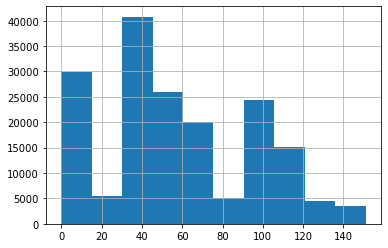

In [9]:
data['Скорость_ротора'].hist()

<AxesSubplot:>

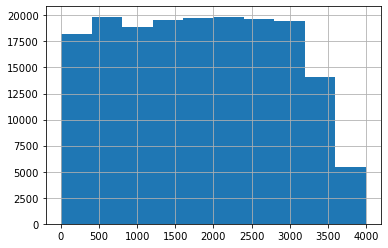

In [10]:
data['Глубина_м'].hist()

<AxesSubplot:>

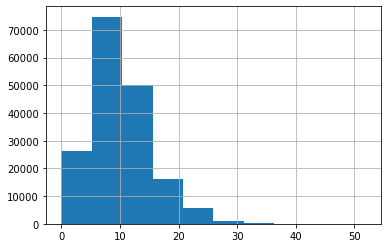

In [11]:
data['Нагрузка_на_долото_тонн'].hist()

<AxesSubplot:>

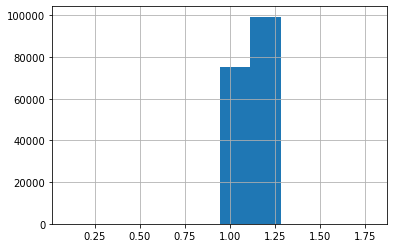

In [12]:
data['Плотность_на_входе_кг/м3'].hist()

<AxesSubplot:>

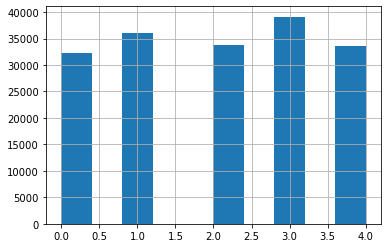

In [13]:
data['№_скважины'].hist()

<AxesSubplot:>

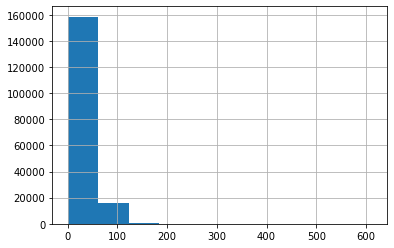

In [14]:
data['Ср_мех_скорость_м/ч'].hist()

In [15]:
len(data)

174830

### Код стратиграфии 621

In [16]:
data=data[data['Код_стратиграфии']==621]

In [17]:
#Сформируем датасет без кода стратиграфии
data=data.drop('Код_стратиграфии', axis=1)

In [18]:
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,№_скважины,Ср_мех_скорость_м/ч
21750,21750,2245.0,12.0,60,1.26,32.7946,178,2,8.1818
21751,21751,2245.1,10.0,60,1.26,32.9663,178,2,6.6667
21752,21752,2245.2,12.0,59,1.26,32.9663,178,2,9.4737
21753,21753,2245.3,12.0,58,1.26,32.9663,178,2,7.6596
21754,21754,2245.4,11.0,58,1.26,32.7946,178,2,7.5000


In [19]:
y=data['Ср_мех_скорость_м/ч']
#X=data.iloc[:, 1:-1]

In [20]:
y.head()

21750    8.1818
21751    6.6667
21752    9.4737
21753    7.6596
21754    7.5000
Name: Ср_мех_скорость_м/ч, dtype: float64

In [21]:
#X.head()

In [22]:
data['№_скважины'].value_counts()

3    4832
1    3550
2    3002
0    2741
4    2416
Name: №_скважины, dtype: int64

In [23]:
data['Диам_скваж_мм'].value_counts()

178    8392
114    8149
Name: Диам_скваж_мм, dtype: int64

<AxesSubplot:>

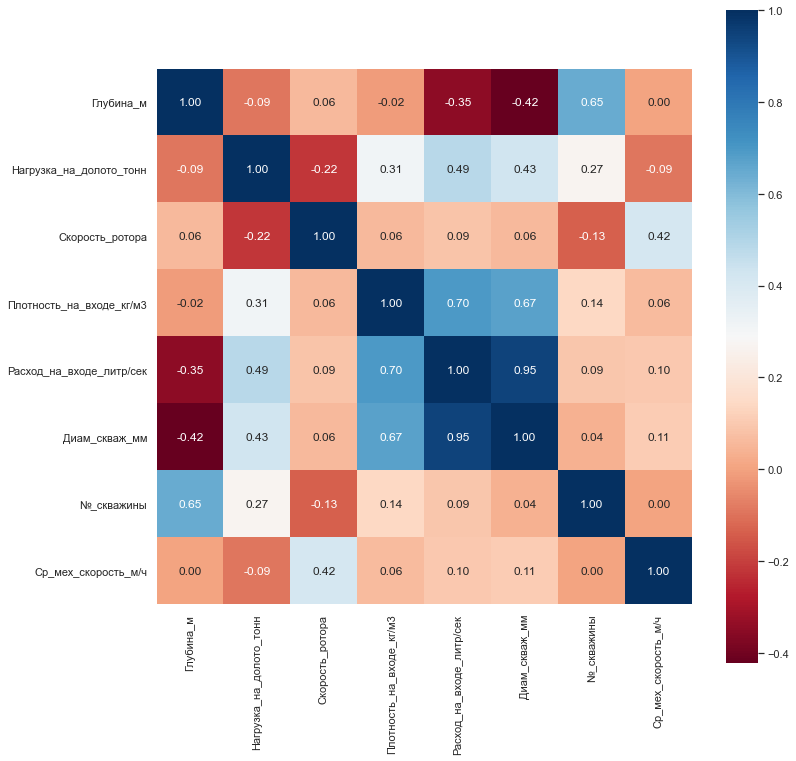

In [24]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.iloc[:, 1:].corr(), square=True,
              annot=True, fmt=".2f", linewidths=0., cmap="RdBu")


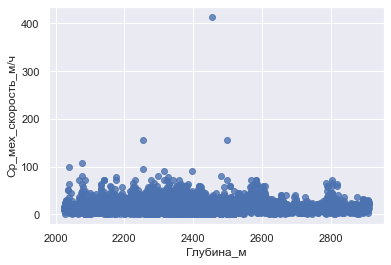

In [25]:
sns.regplot(x='Глубина_м', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

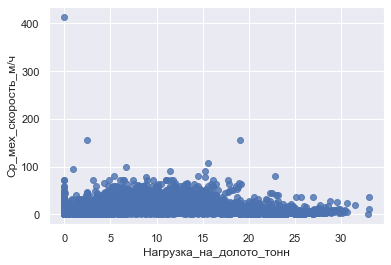

In [26]:
sns.regplot(x='Нагрузка_на_долото_тонн', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

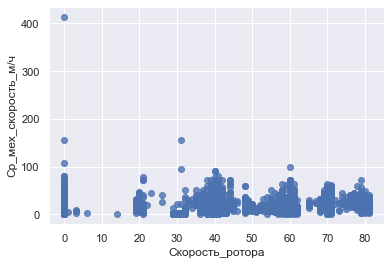

In [27]:
sns.regplot(x='Скорость_ротора', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

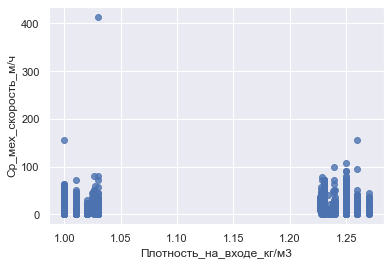

In [28]:
sns.regplot(x='Плотность_на_входе_кг/м3', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

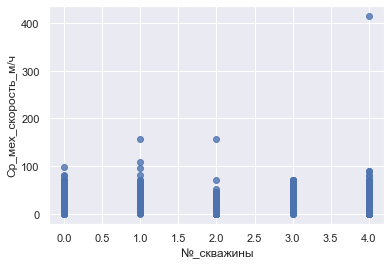

In [29]:
sns.regplot(x='№_скважины', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

In [30]:
data=data.drop(['Расход_на_входе_литр/сек','Диам_скваж_мм'], axis = 1)
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
21750,21750,2245.0,12.0,60,1.26,2,8.1818
21751,21751,2245.1,10.0,60,1.26,2,6.6667
21752,21752,2245.2,12.0,59,1.26,2,9.4737
21753,21753,2245.3,12.0,58,1.26,2,7.6596
21754,21754,2245.4,11.0,58,1.26,2,7.5000


In [31]:
X=data.iloc[:, 1:-1]

<AxesSubplot:>

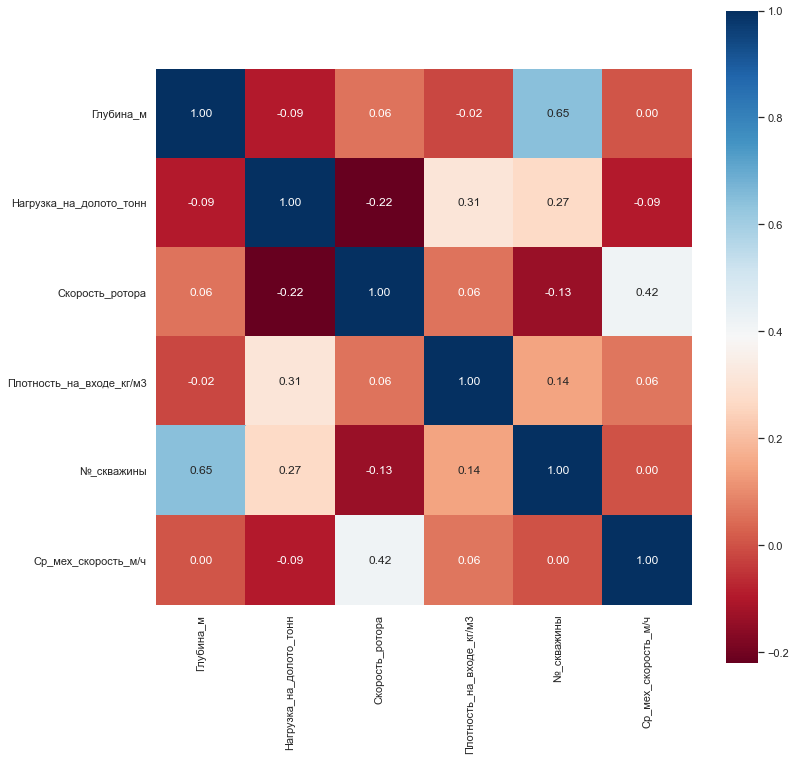

In [32]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.iloc[:, 1:].corr(), square=True,
              annot=True, fmt=".2f", linewidths=0., cmap="RdBu")


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
Model1=LinearRegression()
Model1.fit(X_train, y_train)
y_pred=Model1.predict(X_test)
y_pred;

In [34]:
print('MSE=', mean_squared_error(y_pred, y_test))
print('MAE=', mean_absolute_error(y_pred, y_test))
print ('R-squared=', Model1.score(X_train, y_train))

MSE= 74.88085723915978
MAE= 6.189957943474682
R-squared= 0.1698013335305052


##### Полиномы

In [35]:
data_sq=data*data
data_sq.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
21750,473062500,5040025.00,144.0,3600,1.5876,4,66.941851
21751,473106001,5040474.01,100.0,3600,1.5876,4,44.444889
21752,473149504,5040923.04,144.0,3481,1.5876,4,89.750992
21753,473193009,5041372.09,144.0,3364,1.5876,4,58.669472
21754,473236516,5041821.16,121.0,3364,1.5876,4,56.250000


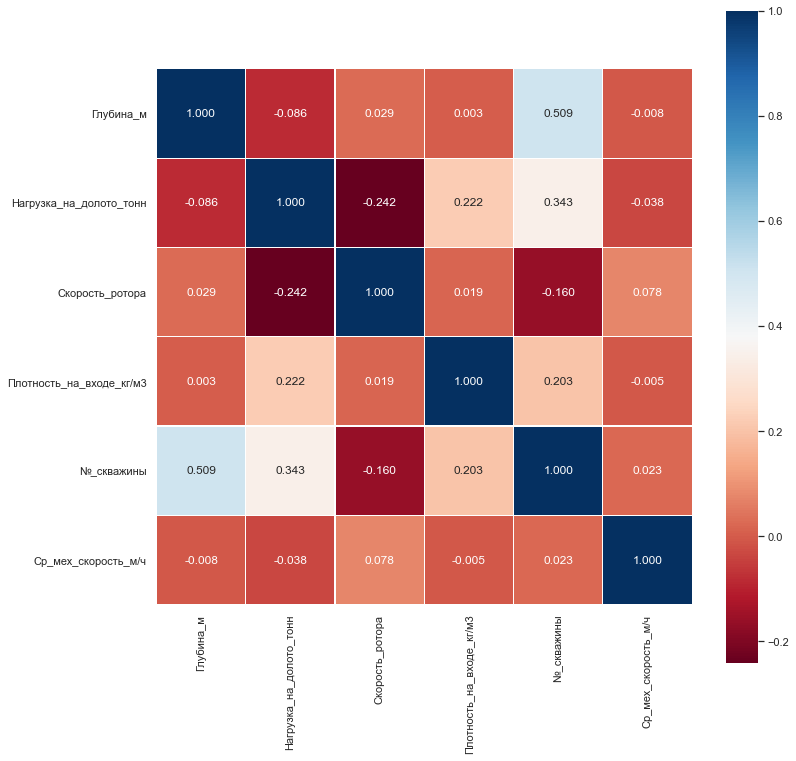

In [36]:
X=data_sq.iloc[:,1:-1]
y=data_sq['Ср_мех_скорость_м/ч']
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(pd.concat([X, y], axis=1).corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu");

##### Логарифмы

In [37]:
data_log=np.log(data)
data_log.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
21750,9.987369,7.716461,2.484907,4.094345,0.231112,0.693147,2.101912
21751,9.987415,7.716505,2.302585,4.094345,0.231112,0.693147,1.897125
21752,9.987461,7.716550,2.484907,4.077537,0.231112,0.693147,2.248520
21753,9.987507,7.716594,2.484907,4.060443,0.231112,0.693147,2.035960
21754,9.987553,7.716639,2.397895,4.060443,0.231112,0.693147,2.014903


In [38]:
X=data_log.iloc[:,1:-1]
X.head()

,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины
21750,7.716461,2.484907,4.094345,0.231112,0.693147
21751,7.716505,2.302585,4.094345,0.231112,0.693147
21752,7.716550,2.484907,4.077537,0.231112,0.693147
21753,7.716594,2.484907,4.060443,0.231112,0.693147
21754,7.716639,2.397895,4.060443,0.231112,0.693147


In [39]:
y=data_log['Ср_мех_скорость_м/ч']

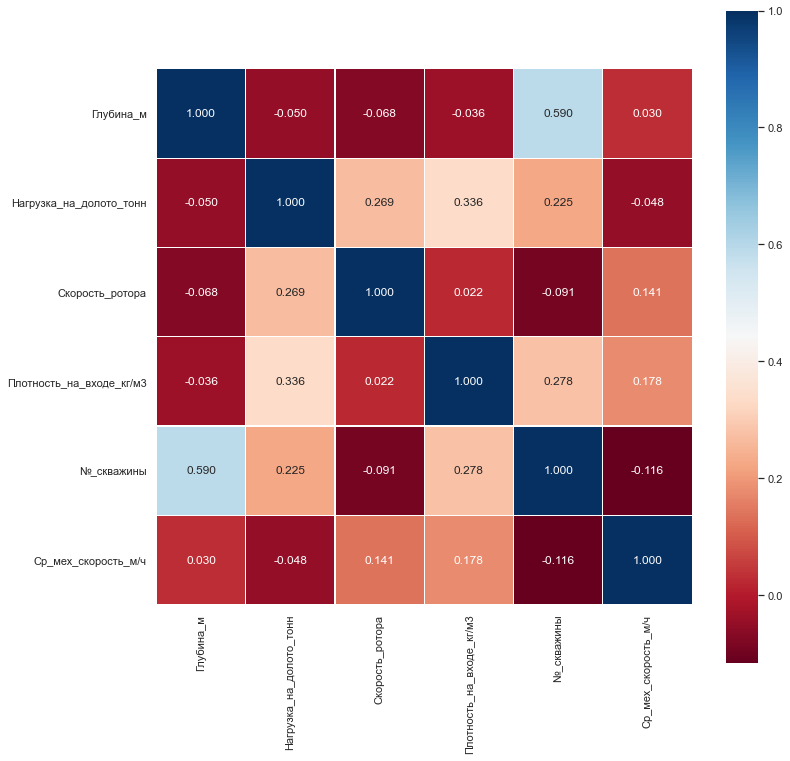

In [40]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(pd.concat([X, y], axis=1).corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu");